In [1]:
from keras.layers import Input ,Lambda,Dense, Flatten

Using TensorFlow backend.


In [0]:
from google.colab import drive

In [0]:
drive.mount('/content/drive',force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
from keras.models import Model

In [3]:
from keras.applications.vgg16 import VGG16

In [4]:
from keras.applications.vgg16 import preprocess_input

In [5]:
from keras.preprocessing import image 

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [7]:
from keras.models import Sequential

In [8]:
import numpy as np

In [9]:
from glob import glob

In [10]:
import matplotlib.pyplot as plt

In [11]:
IMAGE_SIZE=[224,224]

In [12]:
train_path="E:/project data/data/train"
vali_path="E:/project data/data/test"

In [13]:
vgg=VGG16(input_shape=IMAGE_SIZE+[3],weights='imagenet',include_top=False)

Instructions for updating:
Colocations handled automatically by placer.


In [14]:
for layer in vgg.layers:
  layer.trainable=False

In [15]:
folders=glob("E:/project data/data/train/*")

In [16]:
x=Flatten()(vgg.output)

In [17]:
prediction =Dense(26,activation='softmax')(x)

In [18]:
model=Model(input=vgg.input,output=prediction)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  """Entry point for launching an IPython kernel.


In [19]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [29]:
model.compile(loss='categorical_crossentropy',optimizer='adam')

In [30]:
from keras.preprocessing.image import ImageDataGenerator

In [31]:
train_datagen=ImageDataGenerator(
    rescale=1./255,
    shear_range = 0.2,
    zoom_range=0.2,
    horizontal_flip=True)


In [32]:
test_datagen=ImageDataGenerator(rescale=1./255)

In [33]:
training_set=train_datagen.flow_from_directory(train_path,target_size=(224,224),batch_size=100,class_mode="categorical")

Found 21907 images belonging to 26 classes.


In [34]:
test_set=test_datagen.flow_from_directory(vali_path,target_size=(224,224),batch_size=100,class_mode="categorical")

Found 5491 images belonging to 26 classes.


In [36]:
r=model.fit_generator(training_set,validation_data=test_set,steps_per_epoch=len(training_set),validation_steps=len(test_set),epochs=10)

Epoch 1/10
220/220 [==============================] - 1028s 5s/step - loss: 0.0015 - val_loss: 3.6723e-04
Epoch 2/10
220/220 [==============================] - 966s 4s/step - loss: 7.8526e-04 - val_loss: 2.0965e-04
Epoch 3/10
220/220 [==============================] - 985s 4s/step - loss: 4.9867e-04 - val_loss: 1.3519e-04
Epoch 4/10
220/220 [==============================] - 995s 5s/step - loss: 3.3834e-04 - val_loss: 9.6595e-05
Epoch 5/10
220/220 [==============================] - 1005s 5s/step - loss: 2.4972e-04 - val_loss: 7.2411e-05
Epoch 6/10
220/220 [==============================] - 954s 4s/step - loss: 1.8722e-04 - val_loss: 5.2855e-05
Epoch 7/10
220/220 [==============================] - 943s 4s/step - loss: 1.4651e-04 - val_loss: 4.3921e-05
Epoch 8/10
220/220 [==============================] - 947s 4s/step - loss: 1.1843e-04 - val_loss: 3.4222e-05
Epoch 9/10
220/220 [==============================] - 959s 4s/step - loss: 1.0012e-04 - val_loss: 2.9201e-05
Epoch 10/10
220/220 [

In [37]:
import pickle


pickle_out = open("face1.pickle","wb")
pickle.dump(model, pickle_out)
pickle_out.close()

In [38]:
import tensorflow as tf

In [40]:
from keras.models import load_model

In [41]:
model.save('facekeras1.h5')

In [42]:
pickle_out = open("face11.pickle","wb")
pickle.dump(r, pickle_out)
pickle_out.close()

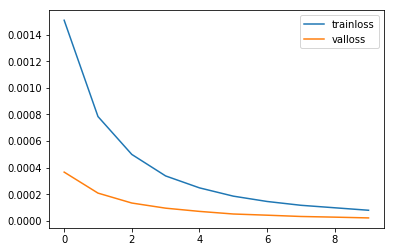

In [43]:
plt.plot(r.history['loss'],label="trainloss")
plt.plot(r.history['val_loss'],label="valloss")
plt.legend()
plt.show()

In [44]:
plt.plot(r.history['acc'],label="train acc")
plt.plot(r.history['val_acc'],label="val acc")
plt.legend()
plt.show()

KeyError: 'acc'